<a href="https://colab.research.google.com/github/monteroanibal/diplomado_GEOIA_IGAC2025/blob/main/unidad_1_6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jupyter Notebook de la sesión

---

# 1. Cargue de librerías

Lo siguiente para importar shapefiles como _GeoDataFrames_, manipular los datos con _pandas_, graficar con _seaborn_ y utilizar métodos de geométricos con _shapely_.

In [ ]:
import geopandas as gpd
import pandas as pd; pd.set_option('display.float_format', lambda x: '%.1f' % x)
import seaborn as sns
from shapely import Point

# 2. Lectura y primera exploración de datos vectoriales

Se descargan las capas que están publicadas en un Github y se descomprimen en la sesión actual.

In [ ]:
%%capture
!wget https://github.com/monteroanibal/diplomado_GEOIA_IGAC2025/raw/refs/heads/main/Insumos/Unidad_1_6_Datos/shapefiles.zip
!unzip -o /content/shapefiles.zip
!rm /content/shapefiles.zip

Se importan las capas descargadas.




In [ ]:
mpio_chia = gpd.read_file("/content/shapefiles/Mpio_Chia/Mpio_Chia.shp")
mzn_cnpv_2018 = gpd.read_file("/content/shapefiles/Censo_DANE_2018/Censo_DANE_2018.shp")
construc_2018 = gpd.read_file("/content/shapefiles/Construccion/Construccion.shp")
clase_area_dvpl = gpd.read_file("/content/shapefiles/Chia_Clase/Chia_Clase.shp")
Perim_urbano_pot = gpd.read_file("/content/shapefiles/Perimetro_urbano_formulacion/Perimetro_urbano_formulacion.shp")

Con el fin de dibujar las geometrías en plano cartesiano utilizando longitud en eje _x_ y latitud en eje _y_, se ajustan las capas de información a un sistema de coordenadas de referencia adecuado.

In [ ]:
mpio_chia.crs

<Geographic 2D CRS: EPSG:4686>
Name: MAGNA-SIRGAS
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Colombia - onshore and offshore. Includes San Andres y Providencia, Malpelo Islands, Roncador Bank, Serrana Bank and Serranilla Bank.
- bounds: (-84.77, -4.23, -66.87, 15.51)
Datum: Marco Geocentrico Nacional de Referencia
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
mzn_cnpv_2018 = mzn_cnpv_2018.to_crs(epsg=4686)
mzn_cnpv_2018.crs

<Geographic 2D CRS: EPSG:4686>
Name: MAGNA-SIRGAS
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Colombia - onshore and offshore. Includes San Andres y Providencia, Malpelo Islands, Roncador Bank, Serrana Bank and Serranilla Bank.
- bounds: (-84.77, -4.23, -66.87, 15.51)
Datum: Marco Geocentrico Nacional de Referencia
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
construc_2018.crs

<Geographic 2D CRS: EPSG:4686>
Name: MAGNA-SIRGAS
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Colombia - onshore and offshore. Includes San Andres y Providencia, Malpelo Islands, Roncador Bank, Serrana Bank and Serranilla Bank.
- bounds: (-84.77, -4.23, -66.87, 15.51)
Datum: Marco Geocentrico Nacional de Referencia
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
clase_area_dvpl = clase_area_dvpl.to_crs(epsg=4686)
clase_area_dvpl.crs

<Geographic 2D CRS: EPSG:4686>
Name: MAGNA-SIRGAS
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Colombia - onshore and offshore. Includes San Andres y Providencia, Malpelo Islands, Roncador Bank, Serrana Bank and Serranilla Bank.
- bounds: (-84.77, -4.23, -66.87, 15.51)
Datum: Marco Geocentrico Nacional de Referencia
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
Perim_urbano_pot = Perim_urbano_pot.to_crs(epsg=4686)
Perim_urbano_pot.crs

<Geographic 2D CRS: EPSG:4686>
Name: MAGNA-SIRGAS
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Colombia - onshore and offshore. Includes San Andres y Providencia, Malpelo Islands, Roncador Bank, Serrana Bank and Serranilla Bank.
- bounds: (-84.77, -4.23, -66.87, 15.51)
Datum: Marco Geocentrico Nacional de Referencia
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Utilizamos la graficación aprendida para comenzar a interpretar los datos espaciales.

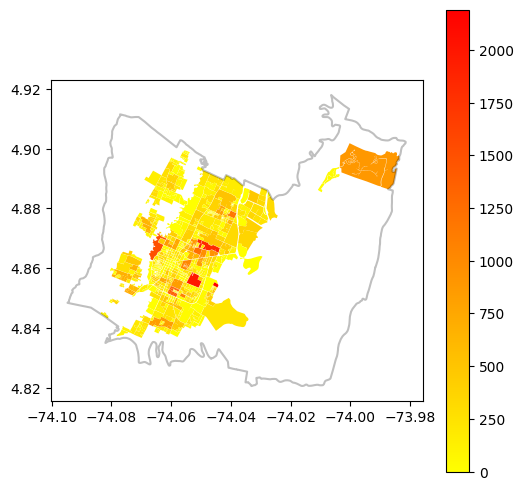

In [ ]:
croquis = mpio_chia.boundary.plot(figsize=(6,6), edgecolor='k', alpha=0.25)
mzn_cnpv_2018.plot(ax=croquis, column= 'TP27_PERSO', legend=True, cmap='autumn_r')
None

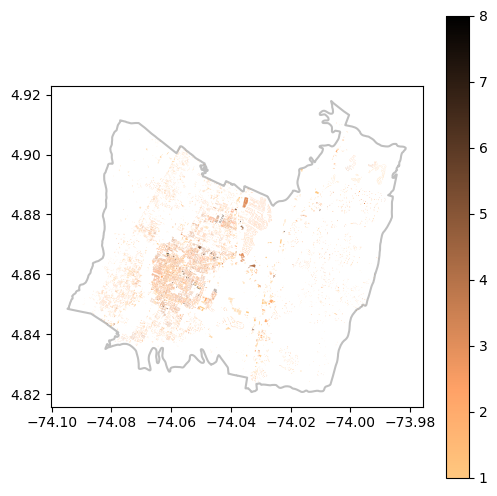

In [ ]:
croquis = mpio_chia.boundary.plot(figsize=(6,6), edgecolor='k', alpha=0.25)
construc_2018.plot(ax=croquis, column= 'numero_pis', legend=True, cmap='copper_r')
None

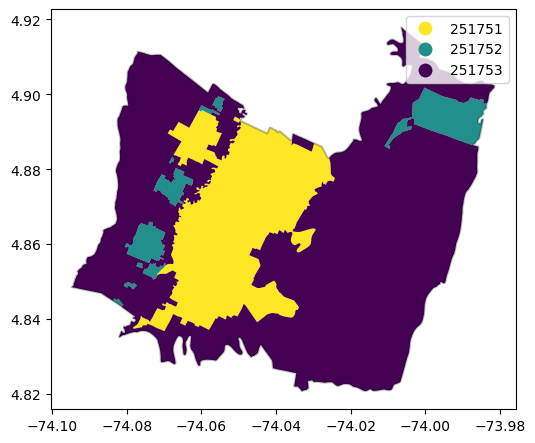

In [ ]:
croquis = mpio_chia.boundary.plot(figsize=(6,6), edgecolor='k', alpha=0.25)
clase_area_dvpl.plot(ax=croquis, column= 'MPIO_CLASE', legend=True, cmap='viridis_r')
None

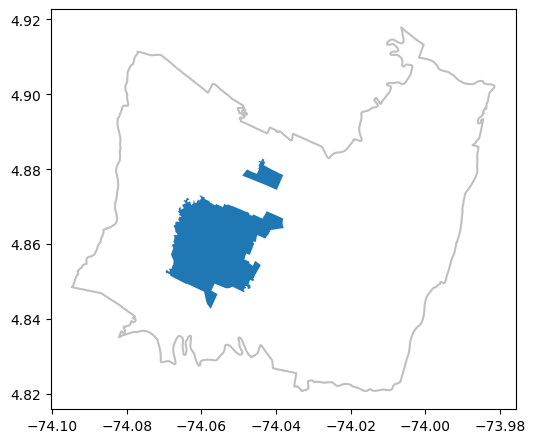

In [ ]:
croquis = mpio_chia.boundary.plot(figsize=(6,6), edgecolor='k', alpha=0.25)
Perim_urbano_pot.plot(ax=croquis)
None

# 3. Construcción de los conjuntos de datos y exploración

Antes de tomar el caso de estudio, es pertinente asignar a cada manzana del MGN y cada construcción de Catastro la información de tipo de área según el MGN y si pertenecen o no al perímetro urbano según el POT.

Aplicamos _spatial join_ a las respectivas capas y etiquetamos los valores categóricos de las respectivas pertenencias antes mencionadas.

In [ ]:
clase_area_dvpl = clase_area_dvpl[['MPIO_CLASE','geometry']]
Perim_urbano_pot['perim_urbano_pot'] = 'Sí'
Perim_urbano_pot = Perim_urbano_pot[['perim_urbano_pot','geometry']]
mzn_cnpv_2018 = mzn_cnpv_2018[['AREA','TVIVIENDA','TP16_HOG','TP27_PERSO','Shape_Area','geometry']]
construc_2018 = construc_2018[['numero_pis','Shape_Area','geometry']]

mzn_cnpv_2018_cr = mzn_cnpv_2018.sjoin(clase_area_dvpl, how="left", predicate='intersects').reset_index(drop=True).drop('index_right', axis='columns')
mzn_cnpv_2018_cr = mzn_cnpv_2018_cr.sjoin(Perim_urbano_pot, how="left", predicate='intersects').reset_index(drop=True).drop('index_right', axis='columns')
mzn_cnpv_2018_cr['perim_urbano_pot'] = mzn_cnpv_2018_cr['perim_urbano_pot'].fillna('No')

construc_2018_cr = construc_2018.sjoin(clase_area_dvpl, how="left", predicate='intersects').reset_index(drop=True).drop('index_right', axis='columns')
construc_2018_cr = construc_2018_cr.sjoin(Perim_urbano_pot, how="left", predicate='intersects').reset_index(drop=True).drop('index_right', axis='columns')
construc_2018_cr['perim_urbano_pot'] = construc_2018_cr['perim_urbano_pot'].fillna('No')

def label_clase(row):
  if row['MPIO_CLASE'] == '251751':
    return 'Cabecera municipal'
  if row['MPIO_CLASE'] == '251752':
    return 'Centros poblados'
  return 'Área rural'
mzn_cnpv_2018_cr['Clase'] = mzn_cnpv_2018_cr.apply(label_clase, axis=1)
construc_2018_cr['Clase'] = construc_2018_cr.apply(label_clase, axis=1)
mzn_cnpv_2018_cr = mzn_cnpv_2018_cr.drop('MPIO_CLASE', axis='columns')
construc_2018_cr = construc_2018_cr.drop('MPIO_CLASE', axis='columns')

Echamos un vistazo al resultado.

In [ ]:
mzn_cnpv_2018_cr

,AREA,TVIVIENDA,TP16_HOG,TP27_PERSO,Shape_Area,geometry,perim_urbano_pot,Clase
0,10972.8,48.0,63.0,162.0,0.0,"POLYGON ((-74.06218 4.85804, -74.06222 4.85796...",Sí,Cabecera municipal
1,38123.4,204.0,238.0,738.0,0.0,"POLYGON ((-74.06303 4.85662, -74.06301 4.85661...",Sí,Cabecera municipal
2,15215.0,87.0,103.0,290.0,0.0,"POLYGON ((-74.06335 4.855, -74.06336 4.855, -7...",Sí,Cabecera municipal
3,5127.5,49.0,62.0,171.0,0.0,"POLYGON ((-74.06343 4.85401, -74.06343 4.854, ...",Sí,Cabecera municipal
4,10275.5,61.0,81.0,198.0,0.0,"POLYGON ((-74.06323 4.8543, -74.06319 4.85428,...",Sí,Cabecera municipal
...,...,...,...,...,...,...,...,...
771,606.3,4.0,5.0,12.0,0.0,"POLYGON ((-74.06745 4.8822, -74.0676 4.88181, ...",No,Centros poblados
772,5168.1,14.0,13.0,40.0,0.0,"POLYGON ((-74.06823 4.88245, -74.06805 4.88235...",No,Área rural
773,5168.1,14.0,13.0,40.0,0.0,"POLYGON ((-74.06823 4.88245, -74.06805 4.88235...",No,Centros poblados
774,2229962.2,361.0,275.0,882.0,0.0,"POLYGON ((-73.99653 4.89259, -73.99663 4.89266...",No,Área rural


In [ ]:
construc_2018_cr

,numero_pis,Shape_Area,geometry,perim_urbano_pot,Clase
0,2,0.0,"POLYGON ((-74.02784 4.87604, -74.02786 4.876, ...",No,Cabecera municipal
1,2,0.0,"POLYGON ((-74.02781 4.87626, -74.02773 4.87621...",No,Cabecera municipal
2,2,0.0,"POLYGON ((-74.02811 4.87629, -74.02813 4.87626...",No,Cabecera municipal
3,2,0.0,"POLYGON ((-74.02815 4.87646, -74.02812 4.87645...",No,Cabecera municipal
4,2,0.0,"POLYGON ((-74.02767 4.87637, -74.02768 4.87632...",No,Cabecera municipal
...,...,...,...,...,...
43664,2,0.0,"POLYGON ((-74.05806 4.84721, -74.05805 4.8472,...",Sí,Cabecera municipal
43665,1,0.0,"POLYGON ((-74.0576 4.84732, -74.05761 4.84728,...",Sí,Cabecera municipal
43666,2,0.0,"POLYGON ((-74.05772 4.8473, -74.05771 4.84729,...",Sí,Cabecera municipal
43667,2,0.0,"POLYGON ((-74.058 4.8473, -74.05804 4.84723, -...",Sí,Cabecera municipal


A continuación se observa que luego del cruce espacial, existe una diferencia en el número de registros (polígonos) de la capas de construcciones y manzanas originales con las luego cruzadas ¿Por qué?

In [ ]:
construc_2018_cr.shape

(43669, 5)

In [ ]:
construc_2018.shape

(43628, 3)

In [ ]:
mzn_cnpv_2018_cr.shape

(776, 8)

In [ ]:
mzn_cnpv_2018.shape

(679, 6)

Podemos observar las tablas de contingencias del número de casos según si las construcciones y las manzanas se encuentren el el perímetro urbano o no.  

In [ ]:
pd.crosstab(construc_2018_cr.perim_urbano_pot, construc_2018_cr.Clase)

Clase,Cabecera municipal,Centros poblados,Área rural
perim_urbano_pot,,,
No,9779,3852,4861
Sí,25177,0,0


In [ ]:
pd.crosstab(mzn_cnpv_2018_cr.perim_urbano_pot, mzn_cnpv_2018_cr.Clase)

Clase,Cabecera municipal,Centros poblados,Área rural
perim_urbano_pot,,,
No,172,82,88
Sí,431,0,3


Por otra parte y para terminar de chequear la información alfanumérica de las capas de información, se despliegan las estadísticas descriptivas univariadas de las variables numericas que están en ellas.

In [ ]:
mzn_cnpv_2018_cr.describe()

,AREA,TVIVIENDA,TP16_HOG,TP27_PERSO,Shape_Area
count,776.0,776.0,776.0,776.0,776.0
mean,36290.8,56.4,57.2,168.8,0.0
std,133162.4,78.6,75.9,222.5,0.0
min,244.3,0.0,0.0,0.0,0.0
25%,3744.1,15.0,15.0,43.8,0.0
50%,10574.9,32.0,33.5,99.5,0.0
75%,33116.8,67.2,72.2,209.2,0.0
max,2229962.2,787.0,728.0,2192.0,0.0


In [ ]:
construc_2018_cr.describe()

,numero_pis,Shape_Area
count,43669.0,43669.0
mean,1.6,0.0
std,0.8,0.0
min,1.0,0.0
25%,1.0,0.0
50%,1.0,0.0
75%,2.0,0.0
max,8.0,0.0


# 4. Caso de estudio: tamaño de unidades de análisis para modelo *Deep Learning*

Se requiere determinar el tamaño de una ventana de recorte de datos ráster multibanda para los datos del periodo 2018 del municipio de Chía con el fin de alimentar un modelo de regresión para estimar número de construcciones y número de habitantes a partir de imágenes de satélite. A continuación se observa el esquema del modelo Deep Learning que asocia cada recorte ráster a un valor de número de construcciones (o de habitantes). Se sabe que la resolución de las imágenes es de 10 metros.

<figure>
<center>
<img src='https://i.ibb.co/qLQ4DvFC/Captura-de-Pantalla-2025-03-20-a-la-s-21-29-03.png' height='300'>
Tomado de Doupe et al.
</center>
</figure>

A continuación, se proponen dos análisis.

# a. Enfoque por cálculo de áreas

Se calcula el área de cada geometría en las capas de información, teniendo en cuenta el sistema de coordenadas de referencia adecuado para este cálculo.

In [ ]:
mzn_cnpv_2018_cr['area_calc'] = mzn_cnpv_2018_cr['geometry'].to_crs(epsg=3116).area
construc_2018_cr['area_calc'] = construc_2018_cr['geometry'].to_crs(epsg=3116).area

Se calculan estadísticas descriptivas univariadas discriminando por clases, según si pertenece al perímetro urbano o no y el tipo de área según MGN, en cada una de las capas de información. Primero observar el primer ejemplo de línea de código desarrollada para determinar qué realiza cada uno de los métodos utilizados.

In [ ]:
resum_a_1 = construc_2018_cr[['area_calc']].loc[construc_2018_cr['perim_urbano_pot'] == 'Sí'].describe(percentiles=[0.25,0.50,0.75,0.900]).rename(columns={'area_calc': "Area_constr_dentro_perim_urb"})
resum_a_1

,Area_constr_dentro_perim_urb
count,25177.0
mean,75.9
std,179.6
min,0.4
25%,20.8
50%,47.9
75%,82.9
90%,137.4
max,16312.7


Se realizan todos los cálculos discriminados de estadísticas y se unifican en una sola tabla para analizarla.

In [ ]:
resum_a_2 = construc_2018_cr[['area_calc']].loc[construc_2018_cr['perim_urbano_pot'] == 'No'].describe(percentiles=[0.25,0.50,0.75,0.900]).rename(columns={'area_calc': "Area_constr_fuera_perim_urb"})
resum_a_3 = construc_2018_cr[['area_calc']].loc[construc_2018_cr['Clase'] == 'Cabecera municipal'].describe(percentiles=[0.25,0.50,0.75,0.900]).rename(columns={'area_calc': "Area_constr_cabec_mpal"})
resum_a_4 = construc_2018_cr[['area_calc']].loc[construc_2018_cr['Clase'] == 'Centros poblados'].describe(percentiles=[0.25,0.50,0.75,0.900]).rename(columns={'area_calc': "Area_constr_centr_pob"})
resum_a_5 = construc_2018_cr[['area_calc']].loc[construc_2018_cr['Clase'] == 'Área rural'].describe(percentiles=[0.25,0.50,0.75,0.900]).rename(columns={'area_calc': "Area_constr_rurales"})

resum_a_6 = mzn_cnpv_2018_cr[['area_calc']].loc[mzn_cnpv_2018_cr['perim_urbano_pot'] == 'Sí'].describe(percentiles=[0.25,0.50,0.75,0.900]).rename(columns={'area_calc': "Area_mzn_dentro_perim_urb"})
resum_a_7 = mzn_cnpv_2018_cr[['area_calc']].loc[mzn_cnpv_2018_cr['perim_urbano_pot'] == 'No'].describe(percentiles=[0.25,0.50,0.75,0.900]).rename(columns={'area_calc': "Area_mzn_fuera_perim_urb"})
resum_a_8 = mzn_cnpv_2018_cr[['area_calc']].loc[mzn_cnpv_2018_cr['Clase'] == 'Cabecera municipal'].describe(percentiles=[0.25,0.50,0.75,0.900]).rename(columns={'area_calc': "Area_mzn_cabec_mpal"})
resum_a_9 = mzn_cnpv_2018_cr[['area_calc']].loc[mzn_cnpv_2018_cr['Clase'] == 'Centros poblados'].describe(percentiles=[0.25,0.50,0.75,0.900]).rename(columns={'area_calc': "Area_mzn_centr_pob"})

resum_a_x1 = construc_2018_cr[['area_calc']].describe(percentiles=[0.25,0.50,0.75,0.900]).rename(columns={'area_calc': "Area_constr"})
resum_a_x2 = mzn_cnpv_2018_cr[['area_calc']].describe(percentiles=[0.25,0.50,0.75,0.900]).rename(columns={'area_calc': "Area_mzn"})

resum_a_ = pd.concat([resum_a_x1, resum_a_1, resum_a_2, resum_a_3, resum_a_4, resum_a_x2, resum_a_5, resum_a_6, resum_a_7, resum_a_8, resum_a_9], axis=1)

A continuación, se pide comparar los diferentes tamaños de construcciones y manzanas comparando con un potencial tamaño e ventana de recorte, de manera que los recortes representen adecuadamente una representación de las construcciones y las manzanas a través de los datos ráster.

In [ ]:
resum_a_.transpose()

,count,mean,std,min,25%,50%,75%,90%,max
Area_constr,43669.0,95.4,280.5,0.4,28.1,57.5,101.4,176.3,28226.3
Area_constr_dentro_perim_urb,25177.0,75.9,179.6,0.4,20.8,47.9,82.9,137.4,16312.7
Area_constr_fuera_perim_urb,18492.0,121.9,375.1,1.2,37.5,75.2,124.7,228.6,28226.3
Area_constr_cabec_mpal,34956.0,84.9,270.2,0.4,24.4,53.5,93.5,155.4,28226.3
Area_constr_centr_pob,3852.0,88.7,87.8,2.0,37.3,67.9,107.6,173.5,1124.1
Area_mzn,776.0,36290.8,133162.4,244.3,3744.1,10574.9,33116.8,69405.7,2229962.3
Area_constr_rurales,4861.0,175.8,410.3,1.2,43.5,85.3,180.0,353.8,11319.9
Area_mzn_dentro_perim_urb,434.0,17230.6,34697.4,244.3,1973.9,6747.0,16675.9,42956.0,313335.6
Area_mzn_fuera_perim_urb,342.0,60478.3,194223.2,401.4,7519.6,22735.4,52586.2,108853.4,2229962.3
Area_mzn_cabec_mpal,603.0,28820.9,66256.5,244.3,2604.2,9223.4,26194.2,67082.2,1120613.0


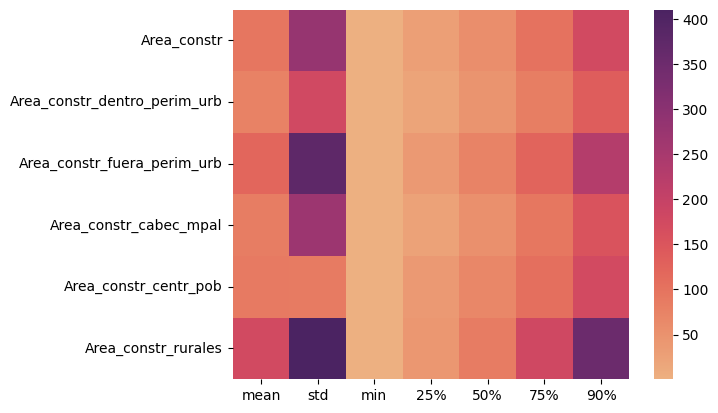

In [ ]:
sns.heatmap(resum_a_.drop(['count','max'], axis=0)[['Area_constr','Area_constr_dentro_perim_urb','Area_constr_fuera_perim_urb','Area_constr_cabec_mpal','Area_constr_centr_pob','Area_constr_rurales']].transpose(), cmap='flare')
None

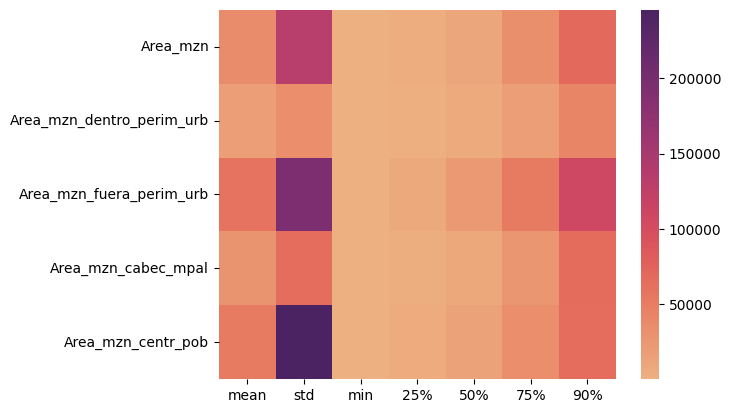

In [ ]:
sns.heatmap(resum_a_.drop(['count','max'], axis=0)[['Area_mzn','Area_mzn_dentro_perim_urb','Area_mzn_fuera_perim_urb','Area_mzn_cabec_mpal','Area_mzn_centr_pob']].transpose(), cmap='flare')
None

# b. Enfoque por cálculo de amplitudes

Se calculan las amplitudes norte-sur y oriente-occidente de cada geometría en las capas de información, teniendo en cuenta el sistema de coordenadas de referencia adecuado para este cálculo.

In [ ]:
def medir_frente(geom):
  # se obtiene el rectaangulo miinimo delimitador alrededor del poliigono
  box = geom.minimum_rotated_rectangle
  # se extraen los veertices
  x, y = box.exterior.coords.xy
  # se calcula la logitud horizontal a partir de los veertices
  return Point(x[0], y[0]).distance(Point(x[1], y[1]))

def medir_largo(geom):
  # se obtiene el rectaangulo miinimo delimitador alrededor del poliigono
  box = geom.minimum_rotated_rectangle
  # se extraen los veertices
  x, y = box.exterior.coords.xy
  # se calcula la logitud vertical a partir de los veertices
  return Point(x[1], y[1]).distance(Point(x[2], y[2]))

In [ ]:
mzn_cnpv_2018_cr = pd.concat([mzn_cnpv_2018_cr, pd.DataFrame({
  'amplitud_ori_occ': mzn_cnpv_2018_cr.to_crs(epsg=3116).geometry.apply(medir_frente).tolist(),
  'amplitud_nte_sur': mzn_cnpv_2018_cr.to_crs(epsg=3116).geometry.apply(medir_largo).tolist()
})], axis=1)

construc_2018_cr = pd.concat([construc_2018_cr, pd.DataFrame({
  'amplitud_ori_occ': construc_2018_cr.to_crs(epsg=3116).geometry.apply(medir_frente).tolist(),
  'amplitud_nte_sur': construc_2018_cr.to_crs(epsg=3116).geometry.apply(medir_largo).tolist()
})], axis=1)

Se chequean los cálculos obtenidos.

In [ ]:
construc_2018_cr[['geometry','amplitud_ori_occ','amplitud_nte_sur']]

,geometry,amplitud_ori_occ,amplitud_nte_sur
0,"POLYGON ((-74.02784 4.87604, -74.02786 4.876, ...",16.2,14.0
1,"POLYGON ((-74.02781 4.87626, -74.02773 4.87621...",16.2,14.0
2,"POLYGON ((-74.02811 4.87629, -74.02813 4.87626...",15.4,13.3
3,"POLYGON ((-74.02815 4.87646, -74.02812 4.87645...",15.4,13.3
4,"POLYGON ((-74.02767 4.87637, -74.02768 4.87632...",16.2,14.0
...,...,...,...
43664,"POLYGON ((-74.05806 4.84721, -74.05805 4.8472,...",11.4,10.3
43665,"POLYGON ((-74.0576 4.84732, -74.05761 4.84728,...",14.5,10.0
43666,"POLYGON ((-74.05772 4.8473, -74.05771 4.84729,...",9.5,8.9
43667,"POLYGON ((-74.058 4.8473, -74.05804 4.84723, -...",7.9,9.1


Nuevamente se realizan todos los cálculos discriminados de estadísticas y se unifican en una sola tabla para analizarla.

In [ ]:
resum_oo_1 = construc_2018_cr[['amplitud_ori_occ']].loc[construc_2018_cr['perim_urbano_pot'] == 'Sí'].describe(percentiles=[0.25,0.50,0.75,0.900]).rename(columns={'amplitud_ori_occ': "Ampl_oo_constr_dentro_perim_urb"})
resum_oo_2 = construc_2018_cr[['amplitud_ori_occ']].loc[construc_2018_cr['perim_urbano_pot'] == 'No'].describe(percentiles=[0.25,0.50,0.75,0.900]).rename(columns={'amplitud_ori_occ': "Ampl_oo_constr_fuera_perim_urb"})
resum_oo_3 = construc_2018_cr[['amplitud_ori_occ']].loc[construc_2018_cr['Clase'] == 'Cabecera municipal'].describe(percentiles=[0.25,0.50,0.75,0.900]).rename(columns={'amplitud_ori_occ': "Ampl_oo_constr_cabec_mpal"})
resum_oo_4 = construc_2018_cr[['amplitud_ori_occ']].loc[construc_2018_cr['Clase'] == 'Centros poblados'].describe(percentiles=[0.25,0.50,0.75,0.900]).rename(columns={'amplitud_ori_occ': "Ampl_oo_constr_centr_pob"})
resum_oo_5 = construc_2018_cr[['amplitud_ori_occ']].loc[construc_2018_cr['Clase'] == 'Área rural'].describe(percentiles=[0.25,0.50,0.75,0.900]).rename(columns={'amplitud_ori_occ': "Ampl_oo_constr_rurales"})

resum_oo_6 = mzn_cnpv_2018_cr[['amplitud_ori_occ']].loc[mzn_cnpv_2018_cr['perim_urbano_pot'] == 'Sí'].describe(percentiles=[0.25,0.50,0.75,0.900]).rename(columns={'amplitud_ori_occ': "Ampl_oo_mzn_dentro_perim_urb"})
resum_oo_7 = mzn_cnpv_2018_cr[['amplitud_ori_occ']].loc[mzn_cnpv_2018_cr['perim_urbano_pot'] == 'No'].describe(percentiles=[0.25,0.50,0.75,0.900]).rename(columns={'amplitud_ori_occ': "Ampl_oo_mzn_fuera_perim_urb"})
resum_oo_8 = mzn_cnpv_2018_cr[['amplitud_ori_occ']].loc[mzn_cnpv_2018_cr['Clase'] == 'Cabecera municipal'].describe(percentiles=[0.25,0.50,0.75,0.900]).rename(columns={'amplitud_ori_occ': "Ampl_oo_mzn_cabec_mpal"})
resum_oo_9 = mzn_cnpv_2018_cr[['amplitud_ori_occ']].loc[mzn_cnpv_2018_cr['Clase'] == 'Centros poblados'].describe(percentiles=[0.25,0.50,0.75,0.900]).rename(columns={'amplitud_ori_occ': "Ampl_oo_mzn_centr_pob"})

resum_oo_x1 = construc_2018_cr[['amplitud_ori_occ']].describe(percentiles=[0.25,0.50,0.75,0.900]).rename(columns={'amplitud_ori_occ': "Ampl_oo_constr"})
resum_oo_x2 = mzn_cnpv_2018_cr[['amplitud_ori_occ']].describe(percentiles=[0.25,0.50,0.75,0.900]).rename(columns={'amplitud_ori_occ': "Ampl_oo_mzn"})

resum_oo_ = pd.concat([resum_oo_x1, resum_oo_1, resum_oo_2, resum_oo_3, resum_oo_4, resum_oo_x2, resum_oo_5, resum_oo_6, resum_oo_7, resum_oo_8, resum_oo_9], axis=1)

resum_ns_1 = construc_2018_cr[['amplitud_nte_sur']].loc[construc_2018_cr['perim_urbano_pot'] == 'Sí'].describe(percentiles=[0.25,0.50,0.75,0.900]).rename(columns={'amplitud_nte_sur': "Ampl_ns_constr_dentro_perim_urb"})
resum_ns_2 = construc_2018_cr[['amplitud_nte_sur']].loc[construc_2018_cr['perim_urbano_pot'] == 'No'].describe(percentiles=[0.25,0.50,0.75,0.900]).rename(columns={'amplitud_nte_sur': "Ampl_ns_constr_fuera_perim_urb"})
resum_ns_3 = construc_2018_cr[['amplitud_nte_sur']].loc[construc_2018_cr['Clase'] == 'Cabecera municipal'].describe(percentiles=[0.25,0.50,0.75,0.900]).rename(columns={'amplitud_nte_sur': "Ampl_ns_constr_cabec_mpal"})
resum_ns_4 = construc_2018_cr[['amplitud_nte_sur']].loc[construc_2018_cr['Clase'] == 'Centros poblados'].describe(percentiles=[0.25,0.50,0.75,0.900]).rename(columns={'amplitud_nte_sur': "Ampl_ns_constr_centr_pob"})
resum_ns_5 = construc_2018_cr[['amplitud_nte_sur']].loc[construc_2018_cr['Clase'] == 'Área rural'].describe(percentiles=[0.25,0.50,0.75,0.900]).rename(columns={'amplitud_nte_sur': "Ampl_ns_constr_rurales"})

resum_ns_6 = mzn_cnpv_2018_cr[['amplitud_nte_sur']].loc[mzn_cnpv_2018_cr['perim_urbano_pot'] == 'Sí'].describe(percentiles=[0.25,0.50,0.75,0.900]).rename(columns={'amplitud_nte_sur': "Ampl_ns_mzn_dentro_perim_urb"})
resum_ns_7 = mzn_cnpv_2018_cr[['amplitud_nte_sur']].loc[mzn_cnpv_2018_cr['perim_urbano_pot'] == 'No'].describe(percentiles=[0.25,0.50,0.75,0.900]).rename(columns={'amplitud_nte_sur': "Ampl_ns_mzn_fuera_perim_urb"})
resum_ns_8 = mzn_cnpv_2018_cr[['amplitud_nte_sur']].loc[mzn_cnpv_2018_cr['Clase'] == 'Cabecera municipal'].describe(percentiles=[0.25,0.50,0.75,0.900]).rename(columns={'amplitud_nte_sur': "Ampl_ns_mzn_cabec_mpal"})
resum_ns_9 = mzn_cnpv_2018_cr[['amplitud_nte_sur']].loc[mzn_cnpv_2018_cr['Clase'] == 'Centros poblados'].describe(percentiles=[0.25,0.50,0.75,0.900]).rename(columns={'amplitud_nte_sur': "Ampl_ns_mzn_centr_pob"})

resum_ns_x1 = construc_2018_cr[['amplitud_nte_sur']].describe(percentiles=[0.25,0.50,0.75,0.900]).rename(columns={'amplitud_nte_sur': "Ampl_ns_constr"})
resum_ns_x2 = mzn_cnpv_2018_cr[['amplitud_nte_sur']].describe(percentiles=[0.25,0.50,0.75,0.900]).rename(columns={'amplitud_nte_sur': "Ampl_ns_mzn"})

resum_ns_ = pd.concat([resum_ns_x1, resum_ns_1, resum_ns_2, resum_ns_3, resum_ns_4, resum_ns_x2, resum_ns_5, resum_ns_6, resum_ns_7, resum_ns_8, resum_ns_9], axis=1)

resum_oons_ = pd.concat([resum_oo_, resum_ns_], axis=1)

Nuevamente se pide comparar los diferentes tamaños de construcciones y manzanas comparando con un potencial tamaño e ventana de recorte, de manera que los recortes representen adecuadamente una representación de las construcciones y las manzanas a través de los datos ráster.

In [ ]:
resum_oons_.transpose()

,count,mean,std,min,25%,50%,75%,90%,max
Ampl_oo_constr,43669.0,11.4,9.6,0.5,6.3,9.5,13.3,18.8,316.7
Ampl_oo_constr_dentro_perim_urb,25177.0,10.6,8.7,0.5,6.0,9.0,12.4,17.3,219.5
Ampl_oo_constr_fuera_perim_urb,18492.0,12.5,10.6,0.6,7.0,10.3,14.5,21.0,316.7
Ampl_oo_constr_cabec_mpal,34956.0,10.8,8.9,0.5,6.0,9.3,12.9,17.7,316.7
Ampl_oo_constr_centr_pob,3852.0,11.3,7.6,0.9,7.0,10.0,13.0,17.6,90.2
Ampl_oo_mzn,776.0,193.8,185.6,10.1,77.7,135.4,253.4,403.2,1555.4
Ampl_oo_constr_rurales,4861.0,15.4,14.0,1.0,7.4,11.2,18.6,29.9,192.8
Ampl_oo_mzn_dentro_perim_urb,434.0,144.7,138.5,10.4,64.9,99.0,168.1,302.0,1014.3
Ampl_oo_mzn_fuera_perim_urb,342.0,256.1,216.6,10.1,112.8,210.9,338.4,461.9,1555.4
Ampl_oo_mzn_cabec_mpal,603.0,178.3,169.6,10.4,70.0,124.6,229.7,382.4,1555.4


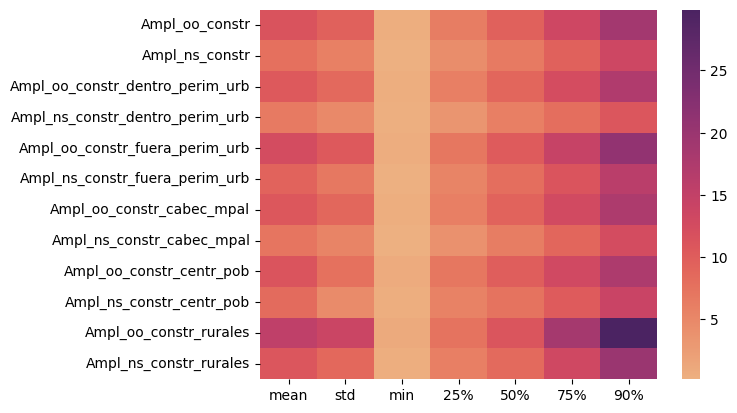

In [ ]:
sns.heatmap(resum_oons_.drop(['count','max'], axis=0)[['Ampl_oo_constr','Ampl_ns_constr','Ampl_oo_constr_dentro_perim_urb','Ampl_ns_constr_dentro_perim_urb','Ampl_oo_constr_fuera_perim_urb','Ampl_ns_constr_fuera_perim_urb','Ampl_oo_constr_cabec_mpal','Ampl_ns_constr_cabec_mpal','Ampl_oo_constr_centr_pob','Ampl_ns_constr_centr_pob','Ampl_oo_constr_rurales','Ampl_ns_constr_rurales']].transpose(), cmap='flare')
None

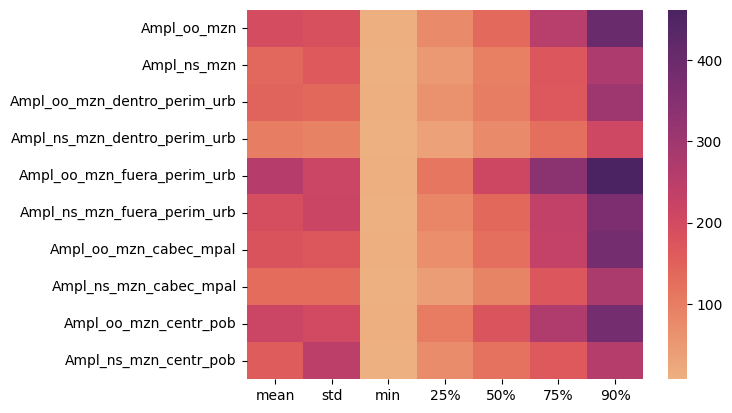

In [ ]:
sns.heatmap(resum_oons_.drop(['count','max'], axis=0)[['Ampl_oo_mzn','Ampl_ns_mzn','Ampl_oo_mzn_dentro_perim_urb','Ampl_ns_mzn_dentro_perim_urb','Ampl_oo_mzn_fuera_perim_urb','Ampl_ns_mzn_fuera_perim_urb','Ampl_oo_mzn_cabec_mpal','Ampl_ns_mzn_cabec_mpal','Ampl_oo_mzn_centr_pob','Ampl_ns_mzn_centr_pob']].transpose(), cmap='flare')
None